In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp
import scipy.linalg
import scipy.optimize

In [2]:
eps = np.loadtxt("eps.dat")

eps = np.loadtxt("m1.000000Lx1536Ly1536alat0.010000eps.dat")
eps2 = np.loadtxt("m2.000000Lx1536Ly1536alat0.010000eps.dat")

In [3]:
alat = 0.010000
Lx = 1536

In [4]:
np.array( np.split( eps.T[0], 1536 ) )[:5]

array([[0.000e+00, 2.000e+00, 3.000e+00, ..., 1.532e+03, 1.533e+03,
        1.535e+03],
       [0.000e+00, 1.000e+00, 3.000e+00, ..., 1.531e+03, 1.533e+03,
        1.534e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, ..., 1.532e+03, 1.534e+03,
        1.535e+03],
       [0.000e+00, 2.000e+00, 3.000e+00, ..., 1.532e+03, 1.533e+03,
        1.535e+03],
       [0.000e+00, 1.000e+00, 3.000e+00, ..., 1.531e+03, 1.533e+03,
        1.534e+03]])

In [5]:
np.array( np.split( eps.T[0], 1536 ) )[:5]

array([[0.000e+00, 2.000e+00, 3.000e+00, ..., 1.532e+03, 1.533e+03,
        1.535e+03],
       [0.000e+00, 1.000e+00, 3.000e+00, ..., 1.531e+03, 1.533e+03,
        1.534e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, ..., 1.532e+03, 1.534e+03,
        1.535e+03],
       [0.000e+00, 2.000e+00, 3.000e+00, ..., 1.532e+03, 1.533e+03,
        1.535e+03],
       [0.000e+00, 1.000e+00, 3.000e+00, ..., 1.531e+03, 1.533e+03,
        1.534e+03]])

In [6]:
eps2d = np.array( np.split( eps.T[2], 1536 ) )

In [7]:
def const_exp(x, E0, A, dE):
    return E0 + A*np.exp(-dE*x)

In [8]:
fftd_=[]

for y1 in range(800):
    line_chosen=[]
    for line in eps[y1*1024:y1*1024+1024]:
        if line[4]==0:
            if line[1] == y1:
                line_chosen.append([line[0], line[1], line[2] ])
    tslice = np.array( line_chosen ).T[2]
    tsliceF = np.fft.fft( tslice )
    fftd_.append( tsliceF )
fftd=np.array(fftd_)

In [9]:
fftd.shape

(800, 512)

In [10]:
meff_allk_=[]
for k in range(fftd.shape[1]):
    meff=-np.log(fftd.T[k][1:]/fftd.T[k][:-1]).real
    meff_allk_.append(meff)
meff_allk = np.array(meff_allk_)

/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_1620/2531294647.py:3: RuntimeWarning: divide by zero encountered in true_divide
  meff=-np.log(fftd.T[k][1:]/fftd.T[k][:-1]).real
/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_1620/2531294647.py:3: RuntimeWarning: invalid value encountered in true_divide
  meff=-np.log(fftd.T[k][1:]/fftd.T[k][:-1]).real
/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_1620/2531294647.py:3: RuntimeWarning: divide by zero encountered in log
  meff=-np.log(fftd.T[k][1:]/fftd.T[k][:-1]).real


In [11]:
fit_range_=[
    [0,300,500],
    [1,300,500],
    [2,300,500],
    [3,300,500],
    [4,300,500],
    [5,300,500],
    [6,300,500],
    [7,300,500],
    [8,300,500],
    [9,300,500],
    [10,300,500],
    [11,300,500],
    [12,300,500],
    [13,300,500],
    [14,300,500],
    [15,300,400],
    [16,300,400],
    [17,300,400],
    [18,300,400],
    [19,300,400],
]

fit_range=np.array(fit_range_)

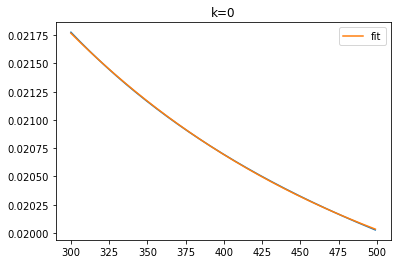

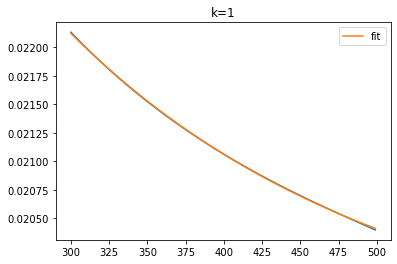

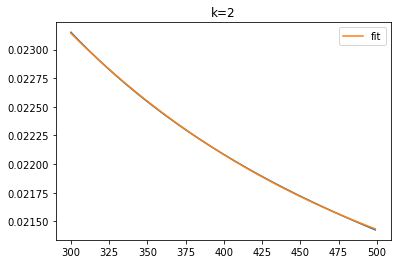

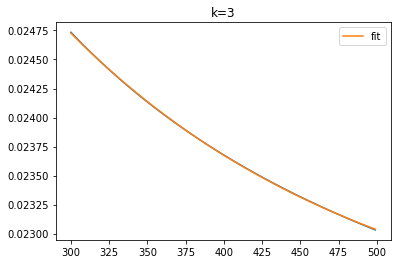

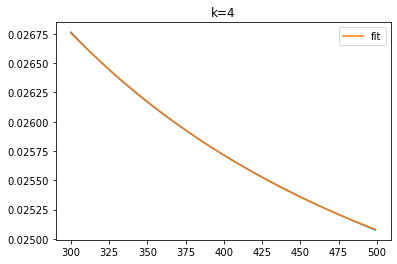

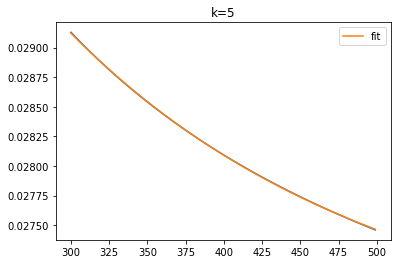

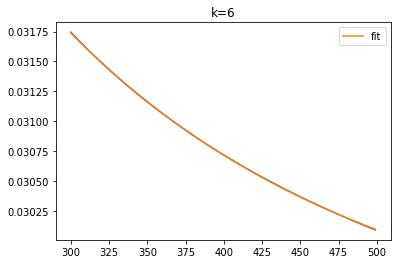

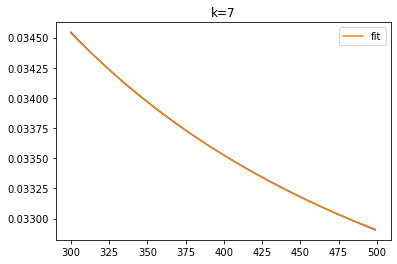

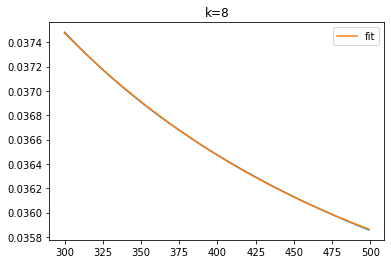

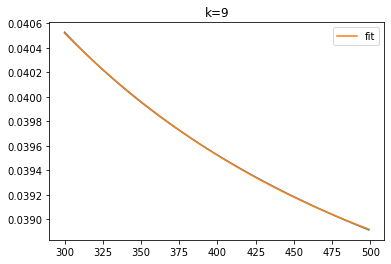

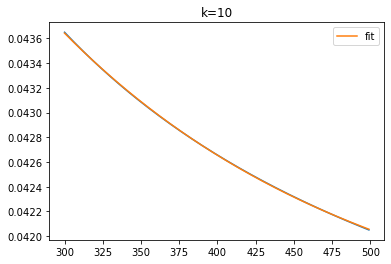

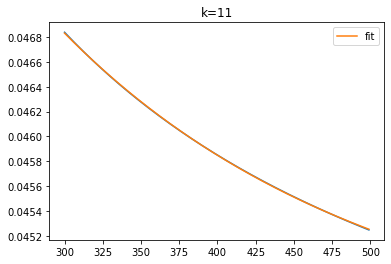

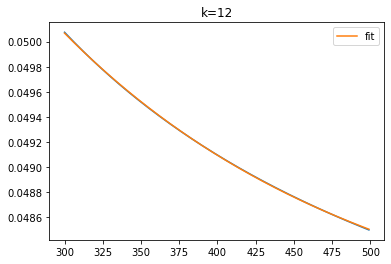

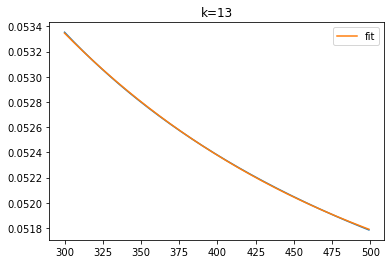

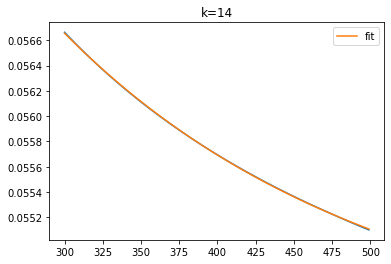

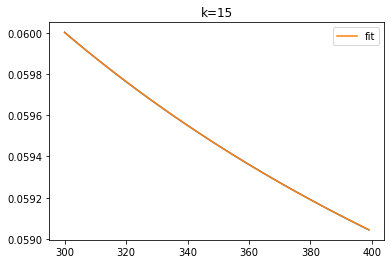

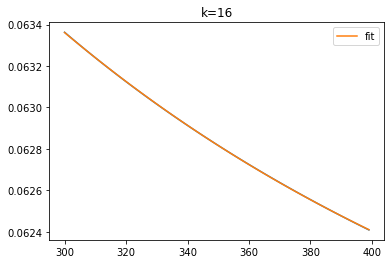

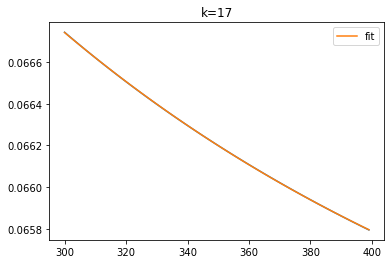

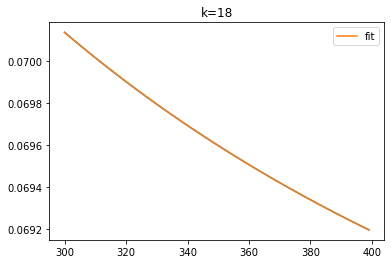

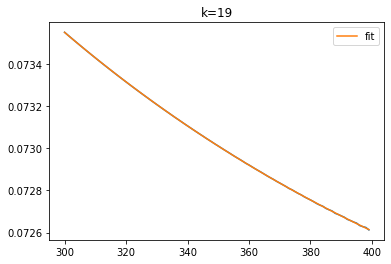

In [12]:
e0_list_=[]

for k in fit_range.T[0]:
    x=np.arange(fit_range[k][1],fit_range[k][2])
    y=meff_allk[k][fit_range[k][1]:fit_range[k][2]]

    plt.plot( x, y )
    # plt.ylim(0, 0.04)

    fit=sp.optimize.curve_fit(const_exp, x, y, p0=[0.02, 0.01, 0.004])
    plt.plot( x, const_exp( x, fit[0][0], fit[0][1], fit[0][2] ), label="fit" )

    plt.title("k="+str(k))
    plt.legend()
    plt.show()

    e0_list_.append([k,fit[0][0]])

e0_list = np.array(e0_list_)

In [13]:
def e_m_k( k, m, A ):
    return A*np.sqrt( m**2 + k**2 )
    
# def const_exp(x, E0, A, dE):
#     return E0 + A*np.exp(-dE*x)

In [22]:
m = 1.0

(array([2.15880758e-02, 8.86669099e+01]),
 array([[ 3.77611585e-09, -2.85401618e-06],
        [-2.85401618e-06,  4.33436153e-03]]))

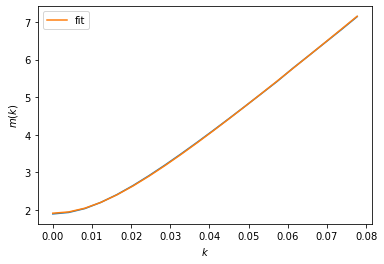

In [23]:
x = e0_list.T[0] * 2.0*np.pi/Lx
y = e0_list.T[1] / alat

plt.plot( x, y )

fit=sp.optimize.curve_fit(e_m_k, x, y, p0=[m*2, 1.0])
plt.plot( x, e_m_k( x, fit[0][0], fit[0][1] ), label="fit" )

plt.xlabel( "$k$" )
plt.ylabel( "$m(k)$" )

plt.legend()

fit

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


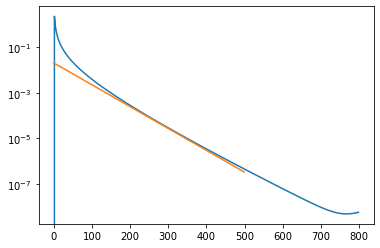

In [24]:
plt.plot( fftd.T[0] )

xx=np.arange(0, 500)
plt.plot( xx, 0.02*np.exp(-0.022*xx) )

plt.yscale("log")

In [25]:
1536/3

512.0

In [221]:
eps[:1024].T[2]

array([-9.50727003,  0.73667837,  0.2839783 , ...,  0.16014711,
        0.2839783 ,  1.78835694])

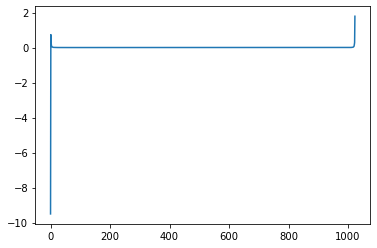

In [222]:
plt.plot( eps[:1024].T[2] )

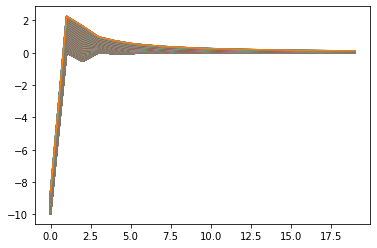

In [156]:
plt.plot(fftd.real)

In [135]:
t=1
tslice = retrieved[t].T[2]

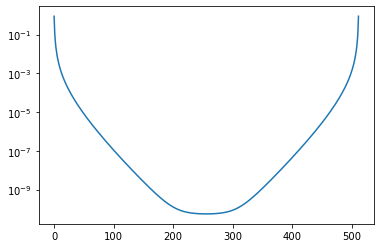

In [136]:
plt.plot(tslice)
plt.yscale("log")

In [113]:
tsliceF = np.fft.fft( tslice )

(0.01, 3.0)

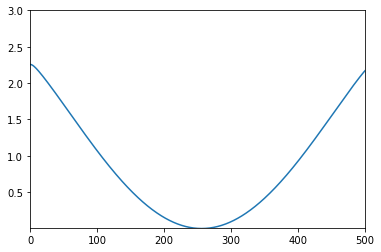

In [128]:
plt.plot( tsliceF.real )

# plt.yscale("log")
plt.xlim(0,500)
plt.ylim(0.01, 3)

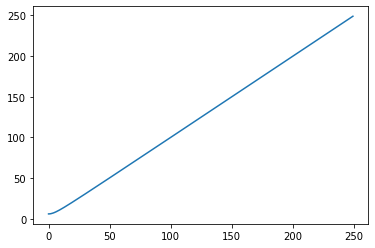

In [134]:
krange=np.arange(0,250)
m=6.0
tt=1

disp = np.sqrt( krange**2 + m**2 )
yyy=-0.5/disp * np.exp(-disp*tt)

plt.plot( krange, disp )

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [26]:
eps2d[0]

array([-9.50727003,  0.73667837,  0.2839783 , ...,  0.16014711,
        0.2839783 ,  1.78835694])

In [27]:
eps2d.T.shape

(1024, 1536)

In [28]:
toplot=np.array([ [np.sqrt(v[0]**2+v[1]**2)*0.01, v[2]] for v in eps ])

toplot2=np.array([ [np.sqrt(v[0]**2+v[1]**2)*0.01, v[2]] for v in eps2 ])

In [29]:
xx = np.linspace(0, 1, 101)

In [30]:
xx

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [31]:
alat=0.01

In [32]:
eps.shape

(1572864, 4)

In [33]:
1/alat

100.0

(0.0, 10.0)

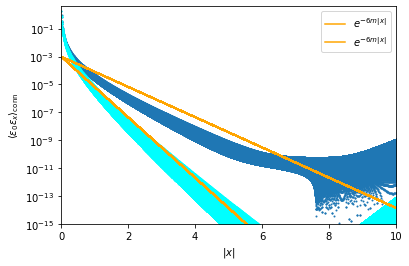

In [34]:
# plt.plot( xx, eps2d[0], label="y=0" )
# plt.plot( xx, eps2d.T[0], label="x=0" )

plt.scatter( toplot.T[0], toplot.T[1], s=1 )
plt.scatter( toplot2.T[0], toplot2.T[1], s=1, c="cyan" )
# plt.plot( xx, np.exp(-xx), label="$1/r^2$" )
plt.plot( toplot.T[0], 0.001*np.exp(-2.5*toplot.T[0]), label="$e^{-6m|x|}$", c="orange" )
plt.plot( toplot.T[0], 0.001*np.exp(-5*toplot.T[0]), label="$e^{-6m|x|}$", c="orange" )

plt.legend()

plt.yscale("log")
# plt.xscale("log")

plt.xlabel("$|x|$")
plt.ylabel("$\\langle \\varepsilon_0 \\varepsilon_x\\rangle_{\\rm conn}$")

plt.ylim(1.0e-15, 4)
plt.xlim(0, 10)

# plt.savefig("../figs/eps_corr.pdf", bbox_inches="tight")

In [6]:
from mpl_toolkits import mplot3d

/var/folders/mg/t8fn6fpj4bj1f7zd8q4m_6p40000gn/T/ipykernel_6655/454102474.py:3: RuntimeWarning: invalid value encountered in log
  ax.scatter( eps.T[0], eps.T[1], np.log(eps.T[2]) )


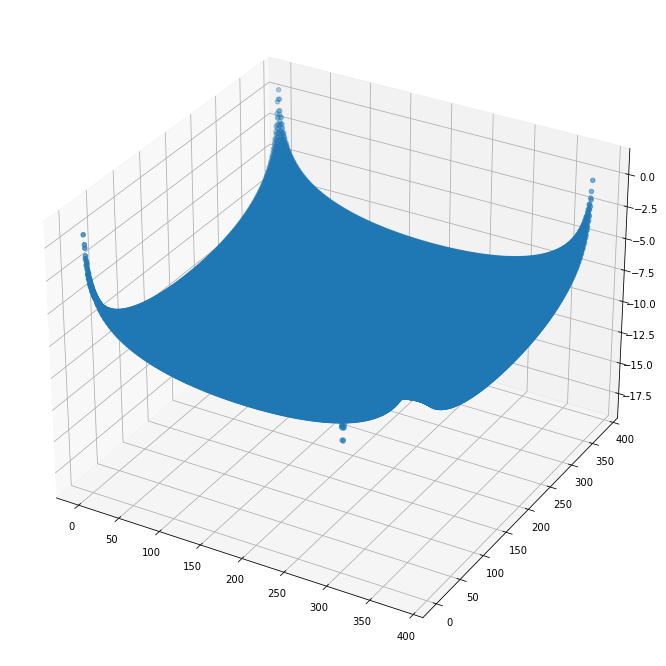

In [7]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter( eps.T[0], eps.T[1], np.log(eps.T[2]) )

# ax.set_yscale("log")

In [34]:
spec_m001 = np.loadtxt("spec_m001.dat")
spec_m1 = np.loadtxt("spec_m1.dat")
Lx = 36
Ly = 36

In [35]:
nvacant = int(Lx*Ly/3)
spec_nontriv_m1 = spec_m1[2*nvacant:]
spec_nontriv_m001 = spec_m001[2*nvacant:]

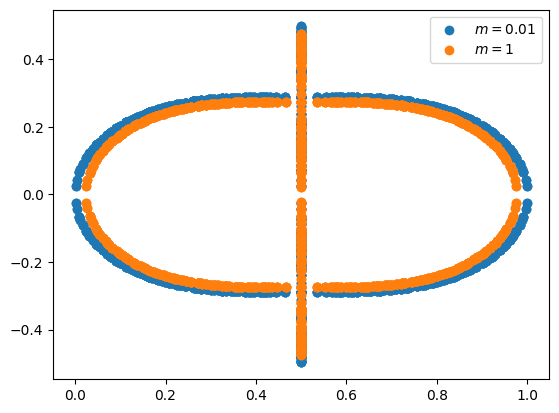

In [36]:
plt.scatter( spec_nontriv_m001.T[0], spec_nontriv_m001.T[1], label="$m=0.01$" )
plt.scatter( spec_nontriv_m1.T[0], spec_nontriv_m1.T[1], label="$m=1$")
plt.legend()

plt.savefig("spectrum.pdf", bbox_inches='tight')

In [ ]:
Lx = 36
Ly = 36

In [37]:
dinv0 = np.loadtxt("Dinv0.dat")
dinv1 = np.loadtxt("Dinv1.dat")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x84 in position 3: invalid start byte

In [60]:
y0psipsi=np.loadtxt("y0_psipsi.dat")
alat=0.01

In [61]:
xx=y0psipsi.T[0]*alat

/tmp/ipykernel_273721/2249424689.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot( xx, 0.000001/xx**3 )


(1e-10, 1.0)

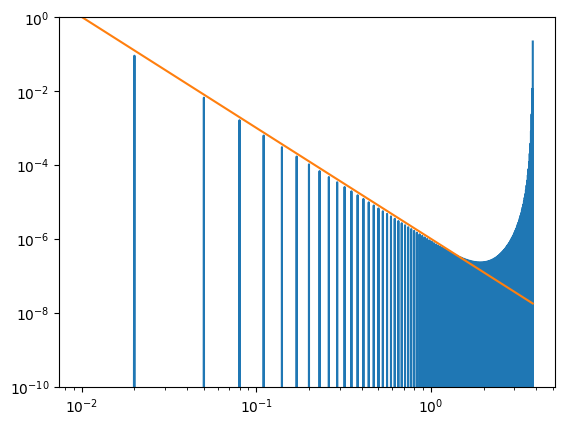

In [74]:
plt.plot( xx, y0psipsi.T[1] )
plt.yscale("log")
plt.xscale("log")

plt.plot( xx, 0.000001/xx**3 )

plt.ylim(1.0e-10, 1.0)

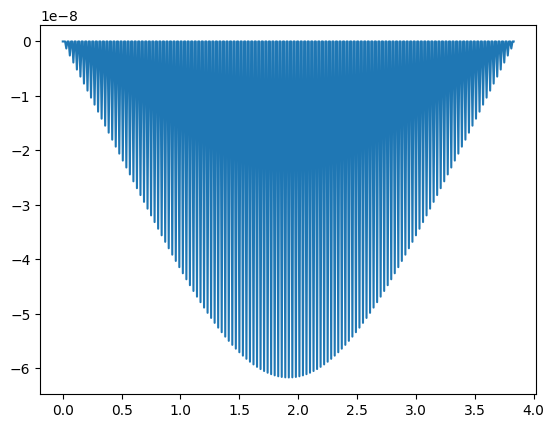

In [75]:
plt.plot( xx, y0psipsi.T[2] )

/tmp/ipykernel_273721/51402980.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot( xx, 0.008/xx**1.0 )


(0.001, 1.0)

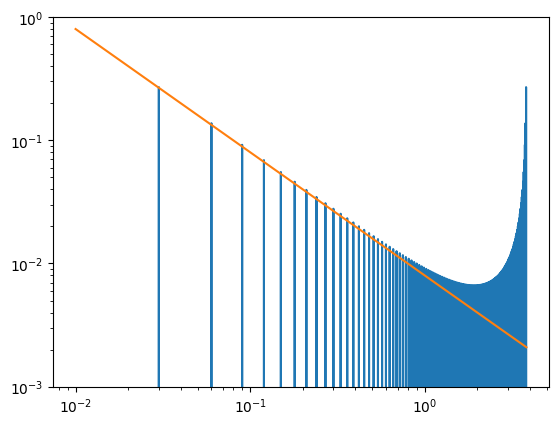

In [89]:
plt.plot( xx, y0psipsi.T[3] )
plt.yscale("log")
plt.xscale("log")

plt.plot( xx, 0.008/xx**1.0 )

plt.ylim(1.0e-3, 1.0)

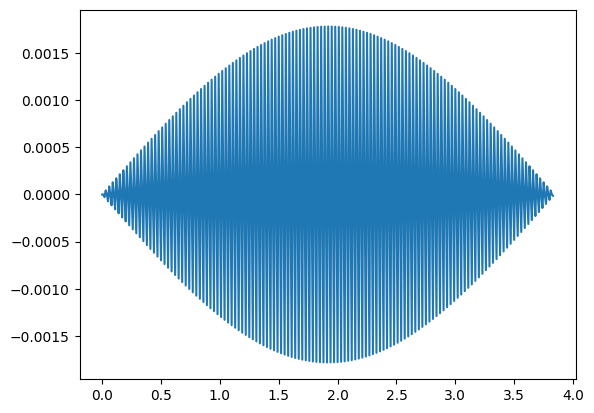

In [83]:
plt.plot( xx, y0psipsi.T[4] )